In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [6]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima=pd.DataFrame(pima)
pima=pima.drop(index=[0])
print(pima.head())
print(pima.info())



  pregnant glucose  bp skin insulin   bmi pedigree age label
1        6     148  72   35       0  33.6    0.627  50     1
2        1      85  66   29       0  26.6    0.351  31     0
3        8     183  64    0       0  23.3    0.672  32     1
4        1      89  66   23      94  28.1    0.167  21     0
5        0     137  40   35     168  43.1    2.288  33     1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  768 non-null    object
 1   glucose   768 non-null    object
 2   bp        768 non-null    object
 3   skin      768 non-null    object
 4   insulin   768 non-null    object
 5   bmi       768 non-null    object
 6   pedigree  768 non-null    object
 7   age       768 non-null    object
 8   label     768 non-null    object
dtypes: object(9)
memory usage: 60.0+ KB
None


In [7]:
pima=pima.astype(float)
pima['pregnant']=pima['pregnant'].astype(int)
pima['glucose']=pima['glucose'].astype(int)
pima['bp']=pima['bp'].astype(int)
pima['skin']=pima['skin'].astype(int)
pima['label']=pima['label'].astype(int)

print(pima.head())
print(pima.info())

   pregnant  glucose  bp  skin  insulin   bmi  pedigree   age  label
1         6      148  72    35      0.0  33.6     0.627  50.0      1
2         1       85  66    29      0.0  26.6     0.351  31.0      0
3         8      183  64     0      0.0  23.3     0.672  32.0      1
4         1       89  66    23     94.0  28.1     0.167  21.0      0
5         0      137  40    35    168.0  43.1     2.288  33.0      1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    float64
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    float64
 8   label     768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 60.0 KB
No

In [8]:
print(pima.shape)


(768, 9)


In [9]:
#pima[0]=['5','134','73','36','0','33.9','0.456','48','1']
print(type(pima))

<class 'pandas.core.frame.DataFrame'>


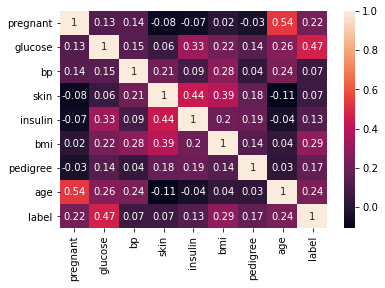

In [10]:
correlation_matrix = pima.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [11]:
feature_cols = ['pregnant', 'insulin', 'bmi','age', 'glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [13]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,y_train)

In [14]:
filename="modeldb"
fileobj=open(filename,'wb')
pickle.dump(clf,fileobj)
fileobj.close()

In [15]:
print(X_test.head())

     pregnant  insulin   bmi   age  glucose  bp  pedigree
286         7    135.0  26.0  51.0      136  74     0.647
102         1      0.0  26.1  22.0      151  60     0.179
582         6      0.0  25.0  27.0      109  60     0.206
353         3      0.0  34.4  46.0       61  82     0.243
727         1    180.0  36.1  25.0      116  78     0.496


In [16]:
y_pred = clf.predict(X_test)

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0]
